Luan Rodrigues Petruitis GU3011356

f0,f1,f2,f3,f4
1.0,269.3,7.1,77.4,2006
1.0,874.774,2.21,56.95,2008
1.0,763.0,2.6,19.84,2011
1.0,326.03,19.4,110.62,2007
1.0,516.22,10.5,119.47,2009


Acuracia: 0.559


/tmp/ipykernel_14544/431837896.py:106: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
/tmp/ipykernel_14544/431837896.py:106: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('1').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


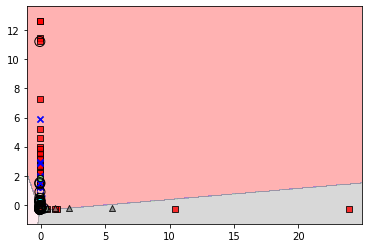

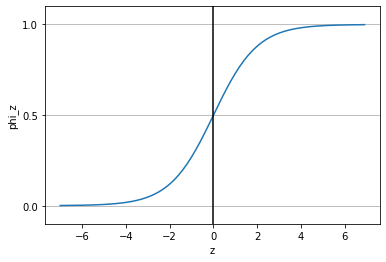

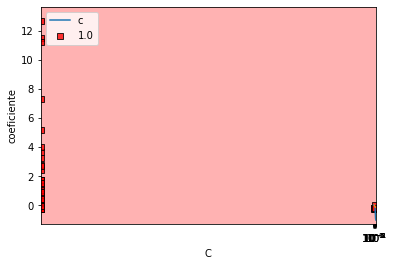

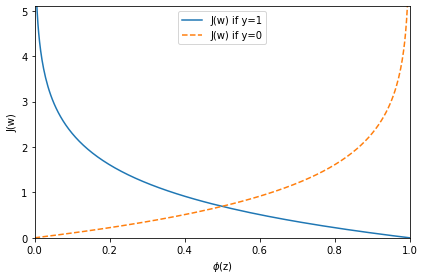

In [6]:
# Instalando bibliotecas de etl
# !pip3 install seaborn
# !pip3 install petl


#Importando as bibliotecas
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
import petl as etl

%matplotlib inline

from sklearn import datasets

# Importando bibliotecas para fazer o ETL
 
# Importando a base Planets
planetas=sns.load_dataset('planets')
planetas.head()

# print(planetas.head())

# Extraindo dados
filename = 'planetas.json'
colunas = ["number", "orbital_period", "mass", "distance", "year"]
# Retirando NaN
planetas = planetas.fillna(0.0) 
planetas_array = planetas[colunas].to_numpy()

# Transformação
planetas_array_transformado = []
for plt in planetas_array:
    planetas_array_transformado.append(tuple(plt))

# print("ARRAY TRANSFORMADO")
# print(planetas_array_transformado)

planetas_np = np.array(planetas_array_transformado, dtype="f4, f4, f4, f4, i4")
# print(planetas_np)

# Fazendo o ETL dos dados e salvando em um csv
planetas_etl = etl.fromarray(planetas_np)
planetas_etl.display(5)
planetas_etl.tocsv(".\\dados\\planetas.csv")

# Ler o arquivo criado
df = pd.read_csv(".\\dados\\planetas.csv")

# Renomeando colunas
#colunas = ["number", "orbital_period", "mass", "distance", "year"]
df = df.rename(columns={'f0': 'number', 'f1': "orbital_period", "f2":"mass", "f3": "distance", "f4": "year"})
# print(df)


# Pré processamento e Regrassão Logistica
from IPython.display import Image

dados_planeta = df[["number", "orbital_period", "mass", "distance", "year"]].to_numpy()
# Separando os dados para o treinamento
X = dados_planeta[:, [1,3]]
y = dados_planeta[:, [0]].reshape((1035))

# Separação
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

# Treinamento
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred=ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Acuracia: %.3f' %accuracy_score(y_test, y_pred))


from matplotlib.colors import ListedColormap
from distutils.version import LooseVersion
import matplotlib.pyplot as plt
import matplotlib


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v', '.', '1')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'brown', 'pink')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        else:
            plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
 
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
test_idx=range(105, 159))
plt.show()


import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z=np.arange(-7,7, 0.1)
phi_z=sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('phi_z')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()


class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state=random_state
    
    def fit(self, X, y):
        rgen=np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def activation(self, z):
        return 1. / (1. +np.exp(-np.clip(z, -250, 250)))
    
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)


X_train_01_suset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
logreg = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
logreg.fit(X_train_01_suset, y_train_01_subset)

plot_decision_regions(X=X_train_01_suset, y=y_train_01_subset, classifier=logreg)

from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(C=100.0, random_state=1,
solver='lbfgs',multi_class='ovr')
lr.fit(X_train_std, y_train)

weights, params = [], []
for c in np.arange(-5, 5):
    lr=LogisticRegression(C=10.**c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label='c')

plt.plot(params, weights[:,1], linestyle='--', label='')
plt.xlabel('C')
plt.ylabel('coeficiente')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()



def cost_1(z):
    return - np.log(sigmoid(z))
def cost_0(z):
    return - np.log(1 - sigmoid(z))


z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()